In [1]:
### Libraries required

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
from matplotlib import style
style.use("fivethirtyeight")


In [3]:
#Setting working directory
import os
os.chdir("/home/gabe/gatech/ml")

In [4]:
#Reading Data
data = pd.read_csv('covid_cdmx_sintomas.csv')
data.shape

/home/gabe/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (86,88,89,90,91) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(708250, 93)

In [5]:
#How many columns and rows

data = data.drop(['_id','id','fechreg','origen','sector','cveentuni','entidad','delega','unidad','entresi','cventine','mpioresi','cvemuni','locresi','cvelocal','tipacien','evoluci','fecdef','semdef','intubado','digcline','hableind','ocupacio','seringre','fecingre','fecinisi','diagprob','fecvaest','tommue','labora','esmigra','paisnal','paisori','fingmex','puerperio','diaspuerp','uci','linaje','viaje1','viaje2','viaje3','viaje4','viaje5','fecinitxantivi','follabor','rango_de_edad'], axis = 1) 

data.shape

(708250, 47)

In [6]:
data["estaemba"].fillna("NO", inplace = True)
data["mesesemb"].fillna(0, inplace = True)
data["esindige"].fillna("NO", inplace = True)
data["antivira"].fillna("No especifica", inplace = True)
data["conocaso"].fillna("NO", inplace = True)
data["conanima"].fillna("NO ESPECIFICA", inplace = True)
data["vacunado"].fillna("SE IGNORA", inplace = True)
data["concerdo"].fillna("NO", inplace = True)

###

data["rectrata"].fillna("SE IGNORA", inplace = True)
data["txcrobia"].fillna("SE IGNORA", inplace = True)
data["txantivi"].fillna("SE IGNORA", inplace = True)
data["contaves"].fillna("SE IGNORA", inplace = True)
data["antipireticos"].fillna("SE IGNORA", inplace = True)


In [7]:

cols = [2,3,4,5,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44]

data.drop(data.columns[cols],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708250 entries, 0 to 708249
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   sexo           708250 non-null  object
 1   edad           708250 non-null  int64 
 2   fiebre         708250 non-null  object
 3   tos            708250 non-null  object
 4   odinogia       708250 non-null  object
 5   disnea         708250 non-null  object
 6   irritabi       708250 non-null  object
 7   diarrea        708250 non-null  object
 8   dotoraci       708250 non-null  object
 9   calofrios      708250 non-null  object
 10  cefalea        708250 non-null  object
 11  mialgias       708250 non-null  object
 12  artral         708250 non-null  object
 13  ataedoge       708250 non-null  object
 14  rinorrea       708250 non-null  object
 15  polipnea       708250 non-null  object
 16  vomito         708250 non-null  object
 17  resdefin       681980 non-null  object
 18  anti

In [8]:
# Avoid droping and use columns where final result is not NA:

data = data[data['resdefin'].notna()]

In [9]:
data.shape

(681980, 19)

In [10]:
data.head()

,sexo,edad,fiebre,tos,odinogia,disnea,irritabi,diarrea,dotoraci,calofrios,cefalea,mialgias,artral,ataedoge,rinorrea,polipnea,vomito,resdefin,antipireticos
0,MASCULINO,62,SI,SI,NO,SI,NO,NO,SI,SI,SI,SI,NO,SI,SI,NO,NO,NEGATIVO,NO
1,MASCULINO,44,NO,NO,NO,NO,NO,NO,NO,NO,NO,SI,NO,NO,NO,NO,NO,NEGATIVO,NO
2,MASCULINO,10,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,SI,NO,NO,NEGATIVO,NO
3,MASCULINO,14,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NEGATIVO,NO
4,FEMENINO,39,NO,SI,NO,SI,NO,SI,NO,NO,SI,NO,NO,NO,NO,NO,NO,SARS-CoV-2,NO


In [11]:
data['resdefin'] = data['resdefin'].apply(lambda x: 1 if x =='SARS-CoV-2' else -1)
data = data.replace(['SI'],1)
data = data.replace(['NO'],-1)
data = data.replace(['MASCULINO'],-1)
data = data.replace(['FEMENINO'],1)


In [12]:
data.tail()

,sexo,edad,fiebre,tos,odinogia,disnea,irritabi,diarrea,dotoraci,calofrios,cefalea,mialgias,artral,ataedoge,rinorrea,polipnea,vomito,resdefin,antipireticos
708245,1,50,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
708246,1,54,-1,-1,-1,1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,-1,1
708247,-1,47,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
708248,1,26,-1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
708249,-1,46,-1,-1,-1,-1,-1,-1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1


In [13]:
from scipy.stats import zscore
data['edad']= zscore(data['edad'])
data.tail()

,sexo,edad,fiebre,tos,odinogia,disnea,irritabi,diarrea,dotoraci,calofrios,cefalea,mialgias,artral,ataedoge,rinorrea,polipnea,vomito,resdefin,antipireticos
708245,1,0.581209,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
708246,1,0.822389,-1,-1,-1,1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,-1,1
708247,-1,0.400323,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
708248,1,-0.865875,-1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
708249,-1,0.340028,-1,-1,-1,-1,-1,-1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1


In [14]:
data = data.replace(['SE IGNORA'],0)


In [15]:
#selected_columns = clean_df[["sexo","edad"]]
#test_df = selected_columns.copy()
#test_df.head()

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 681980 entries, 0 to 708249
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sexo           681980 non-null  int64  
 1   edad           681980 non-null  float64
 2   fiebre         681980 non-null  int64  
 3   tos            681980 non-null  int64  
 4   odinogia       681980 non-null  int64  
 5   disnea         681980 non-null  int64  
 6   irritabi       681980 non-null  int64  
 7   diarrea        681980 non-null  int64  
 8   dotoraci       681980 non-null  int64  
 9   calofrios      681980 non-null  int64  
 10  cefalea        681980 non-null  int64  
 11  mialgias       681980 non-null  int64  
 12  artral         681980 non-null  int64  
 13  ataedoge       681980 non-null  int64  
 14  rinorrea       681980 non-null  int64  
 15  polipnea       681980 non-null  int64  
 16  vomito         681980 non-null  int64  
 17  resdefin       681980 non-nul

In [16]:
y = data[['resdefin']].copy()
y.head()

,resdefin
0,-1
1,-1
2,-1
3,-1
4,1


In [17]:
x=data.copy()
x= x.drop(['resdefin'],axis=1)

In [18]:
x.columns

Index(['sexo', 'edad', 'fiebre', 'tos', 'odinogia', 'disnea', 'irritabi',
       'diarrea', 'dotoraci', 'calofrios', 'cefalea', 'mialgias', 'artral',
       'ataedoge', 'rinorrea', 'polipnea', 'vomito', 'antipireticos'],
      dtype='object')

In [19]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 681980 entries, 0 to 708249
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sexo           681980 non-null  int64  
 1   edad           681980 non-null  float64
 2   fiebre         681980 non-null  int64  
 3   tos            681980 non-null  int64  
 4   odinogia       681980 non-null  int64  
 5   disnea         681980 non-null  int64  
 6   irritabi       681980 non-null  int64  
 7   diarrea        681980 non-null  int64  
 8   dotoraci       681980 non-null  int64  
 9   calofrios      681980 non-null  int64  
 10  cefalea        681980 non-null  int64  
 11  mialgias       681980 non-null  int64  
 12  artral         681980 non-null  int64  
 13  ataedoge       681980 non-null  int64  
 14  rinorrea       681980 non-null  int64  
 15  polipnea       681980 non-null  int64  
 16  vomito         681980 non-null  int64  
 17  antipireticos  681980 non-nul

In [20]:
# Training the model

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


In [21]:
#Create Adaboost classifier object

PositiveCOVID19 = AdaBoostClassifier(n_estimators=500, learning_rate = 1)

In [22]:
model = PositiveCOVID19.fit(X_train,y_train.values.ravel())

In [23]:
y_predicted = PositiveCOVID19.predict(X_test)

In [24]:

from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_predicted)
print("Accuracy obtained:", metrics.accuracy_score(y_test, y_predicted))

Accuracy obtained: 0.7112745241795947


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.38')

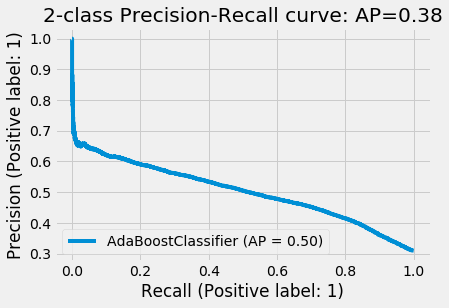

In [25]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(PositiveCOVID19, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))


In [26]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_predicted))
print(confusion_matrix(y_test, y_predicted))

              precision    recall  f1-score   support

          -1       0.74      0.91      0.81     94222
           1       0.57      0.28      0.37     42174

    accuracy                           0.71    136396
   macro avg       0.65      0.59      0.59    136396
weighted avg       0.68      0.71      0.68    136396

[[85342  8880]
 [30501 11673]]


In [28]:
PositiveCOVID19 = AdaBoostClassifier(n_estimators=1000, learning_rate = 1)
model = PositiveCOVID19.fit(X_train,y_train.values.ravel())
y_predicted = PositiveCOVID19.predict(X_test)

from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_predicted)
print("Accuracy obtained:", metrics.accuracy_score(y_test, y_predicted)*100)

Accuracy obtained: 71.13771664858207
